In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Load the dataset
cardio_data = pd.read_csv("cardio_train.csv", delimiter=";")
cardio_data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [13]:
# The 'id' column is dropped
if 'id' in cardio_data.columns:
    cardio_data.drop('id', axis=1, inplace=True)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(cardio_data.head())

# Check for missing values
print("\nMissing values before preprocessing:")
print(cardio_data.isnull().sum())

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
cardio_data['gender'] = label_encoder.fit_transform(cardio_data['gender'])
cardio_data['cholesterol'] = label_encoder.fit_transform(cardio_data['cholesterol'])
cardio_data['gluc'] = label_encoder.fit_transform(cardio_data['gluc'])

# Split the dataset into features (X) and target (y)
X = cardio_data.drop('cardio', axis=1)
y = cardio_data['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = scaler.fit_transform(X_train[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
X_test[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = scaler.transform(X_test[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])

# Display the first few rows of the preprocessed dataset
print("\nFirst few rows of the preprocessed dataset:")
print(cardio_data.head())

# Check for missing values after preprocessing
print("\nMissing values after preprocessing:")
print(cardio_data.isnull().sum())

First few rows of the dataset:
     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       1     168    62.0    110     80            0     0      0   
1  20228       0     156    85.0    140     90            2     0      0   
2  18857       0     165    64.0    130     70            2     0      0   
3  17623       1     169    82.0    150    100            0     0      0   
4  17474       0     156    56.0    100     60            0     0      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

Missing values before preprocessing:
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

First few rows of the preprocessed dataset:
     age  gender  height  weight  ap_hi  ap_lo  choleste

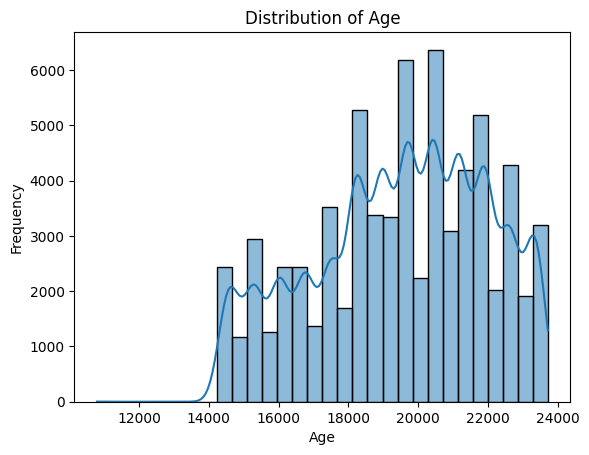

In [15]:
# Histograms and Distribution Plots
sns.histplot(cardio_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

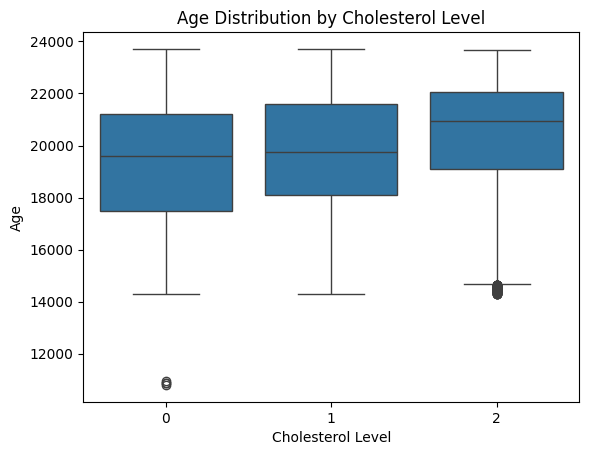

In [16]:
# Box Plots
sns.boxplot(x='cholesterol', y='age', data=cardio_data)
plt.title('Age Distribution by Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Age')
plt.show()


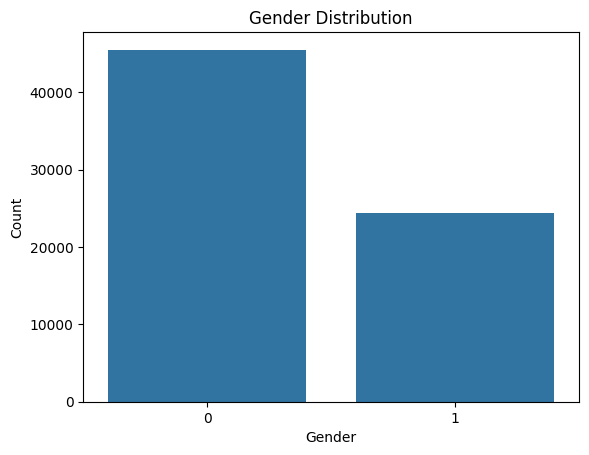

In [17]:
# Count Plots
sns.countplot(x='gender', data=cardio_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

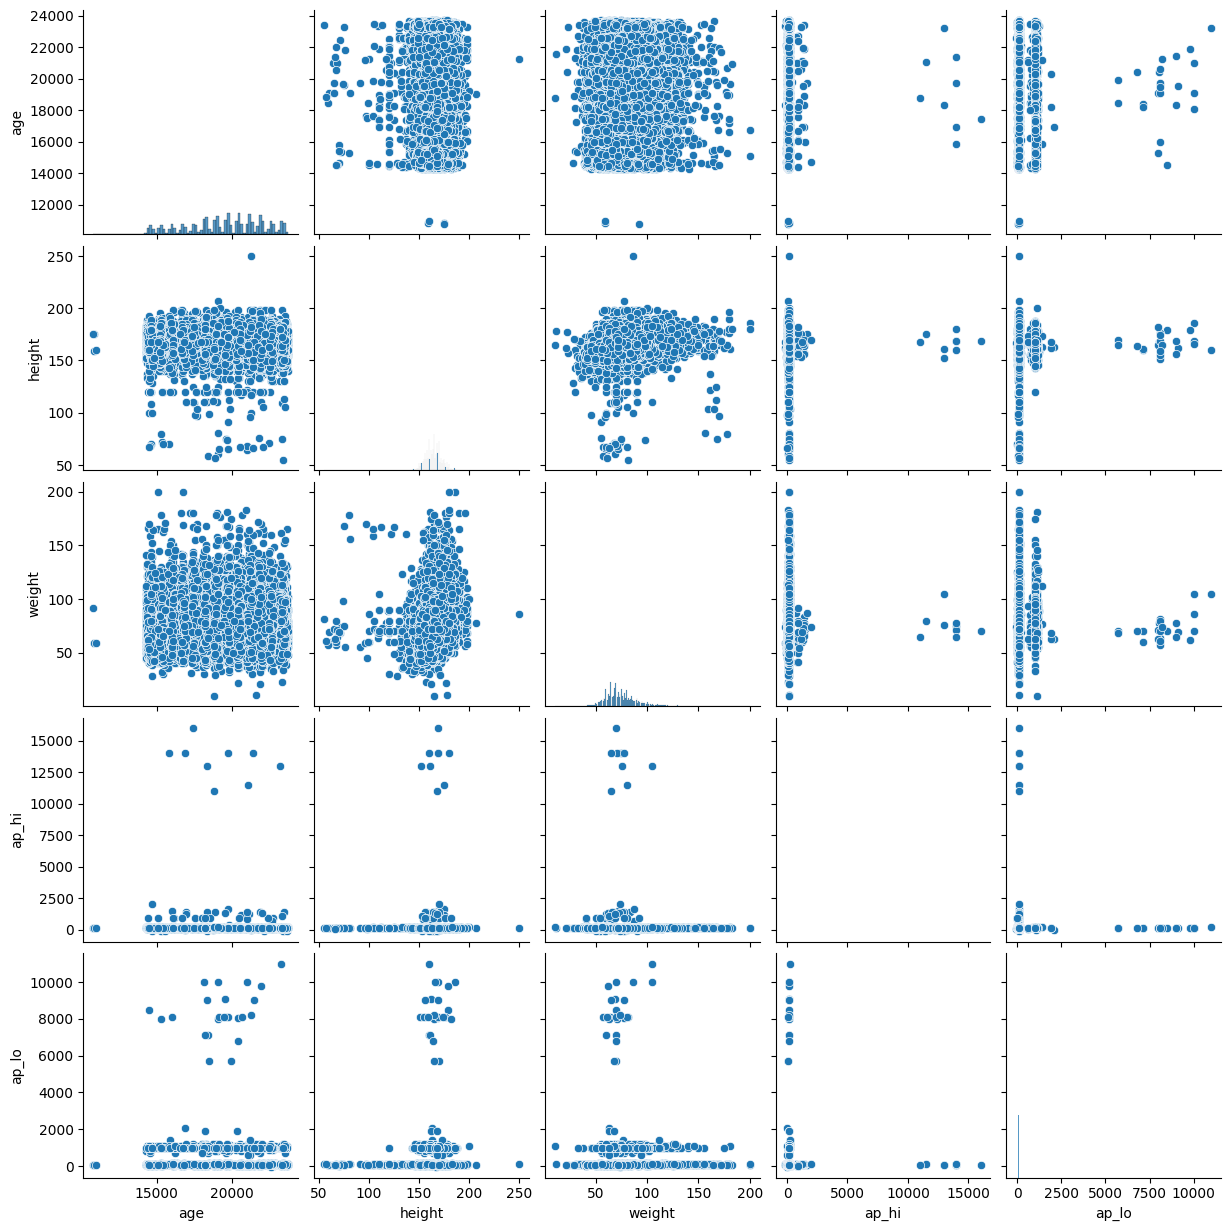

In [18]:
# Pair Plots
sns.pairplot(cardio_data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
plt.show()


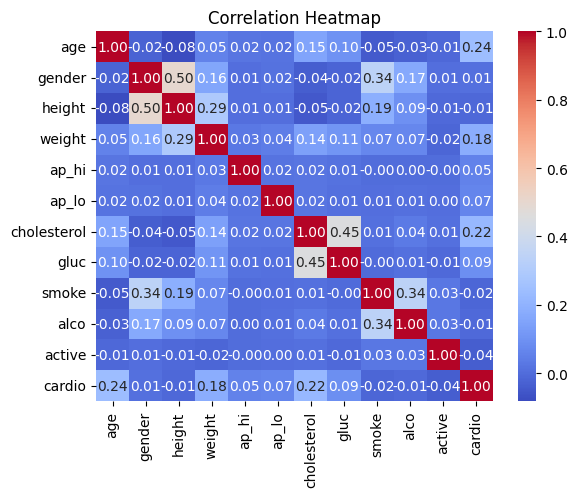

In [19]:
# Correlation Heatmap
correlation_matrix = cardio_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

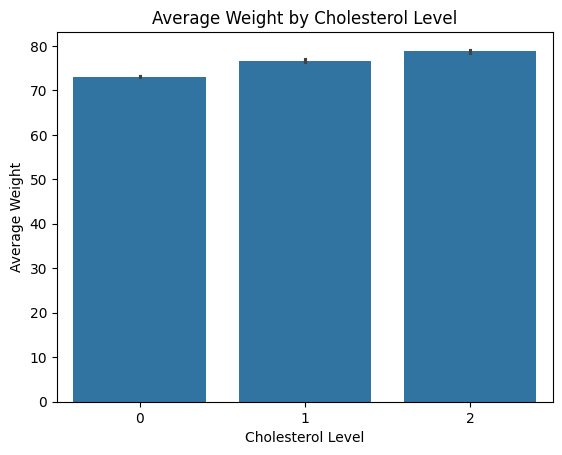

In [20]:
# Bar Plots
sns.barplot(x='cholesterol', y='weight', data=cardio_data)
plt.title('Average Weight by Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Average Weight')
plt.show()


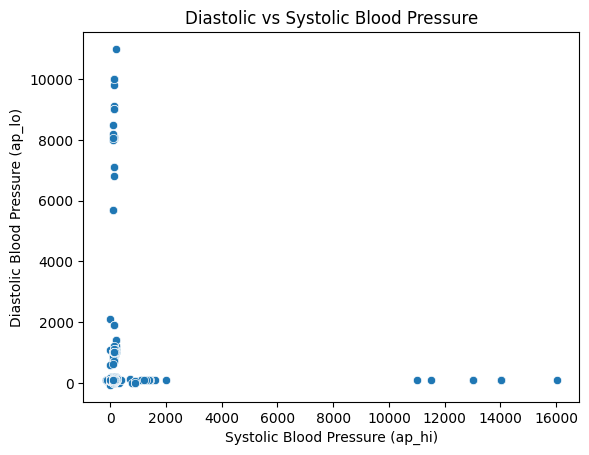

In [21]:
# Scatter Plots
sns.scatterplot(x='ap_hi', y='ap_lo', data=cardio_data)
plt.title('Diastolic vs Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.show()

In [26]:
# Initialize models
svm_model = SVC()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Train models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
svm_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Accuracy scores
svm_accuracy = accuracy_score(y_test, svm_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Print accuracy scores
print("Accuracy of SVM: {:.2f}".format(svm_accuracy))
print("Accuracy of KNN: {:.2f}".format(knn_accuracy))
print("Accuracy of Decision Tree: {:.2f}".format(dt_accuracy))
print("Accuracy of Logistic Regression: {:.2f}".format(lr_accuracy))
print("Accuracy of Random Forest: {:.2f}".format(rf_accuracy))

Accuracy of SVM: 0.74
Accuracy of KNN: 0.65
Accuracy of Decision Tree: 0.63
Accuracy of Logistic Regression: 0.72
Accuracy of Random Forest: 0.72


In [27]:
from sklearn.metrics import classification_report

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
svm_preds = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_preds)
print("Accuracy of SVM: {:.2f}".format(svm_accuracy))

# Print classification report
print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_preds))


Accuracy of SVM: 0.74

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

